# Texas Licenses

We originall got our dataset from the [License Files page](https://www.license.state.tx.us/licensesearch/licfile.asp) from the Texas Department of Licensing and Regulation, but they've changed around since then! I'm pretty sure it's [this dataset](https://www.opendatanetwork.com/dataset/data.texas.gov/7358-krk7), but we'll just use a local version instead of the most current.

# PART ONE: OPENING UP OUR DATASET

## 0. Do your setup

Import what you need to import, etc.

In [95]:
import pandas as pd 
import numpy as np 
%matplotlib inline

In [96]:
df.dtypes

NameError: name 'df' is not defined

## 1. Open the file

We'll start with `licfile.csv`, which is a list of licenses.

In [97]:
df = pd.read_csv("licfile.csv", names= ['LICTYPE', 'LICNUMBER', 'BIZCOUNTY', 'BIZNAME', 'BIZLINE1', 'BIZLINE2', 
                 'BIZCITYSTATE', 'BIZTELEPHONE', 'EXPIRATION', 'OWNER', 'MAILLINE1', 'MAILLINE2', 'MAILCITYSTATE',
                 'MAILCOUNTYCODE', 'MAILCOUNTY', 'MAILZIP', 'TELEPHONE', 'LICSUBTYPE', 'CEFLAG'], dtype = {"EXPIRATION":str, "MAILCOUNTYCODE":str})


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3049: DtypeWarning: Columns (1,15,16) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


## 2. That looks terrible, let's add column names.

It apparently doesn't have headers! **Read the file in again, but setting your own column names**. Their [current data dictionary might not perfectly match](https://www.opendatanetwork.com/dataset/data.texas.gov/7358-krk7), but you can use it to understand what the columns are. For the dataset we're using, the order goes like this:

* LICTYPE
* LICNUMBER
* BIZCOUNTY
* BIZNAME
* BIZLINE1
* BIZLINE2
* BIZCITYSTATE
* BIZTELEPHONE
* EXPIRATION
* OWNER
* MAILLINE1
* MAILLINE2
* MAILCITYSTATE
* MAILCOUNTYCODE
* MAILCOUNTY
* MAILZIP
* TELEPHONE
* LICSUBTYPE
* CEFLAG

**Note:** You can rename the columns to things that make sense - "expiration" is a little more manageable than "LICENSE EXPIRATION DATE (MMDDCCYY)". I've named my License Type column LICTYPE, so if you haven't you'll have to change the rest of my sample code to match.

In [98]:
df.columns

Index(['LICTYPE', 'LICNUMBER', 'BIZCOUNTY', 'BIZNAME', 'BIZLINE1', 'BIZLINE2',
       'BIZCITYSTATE', 'BIZTELEPHONE', 'EXPIRATION', 'OWNER', 'MAILLINE1',
       'MAILLINE2', 'MAILCITYSTATE', 'MAILCOUNTYCODE', 'MAILCOUNTY', 'MAILZIP',
       'TELEPHONE', 'LICSUBTYPE', 'CEFLAG'],
      dtype='object')

# 3. Force string columns to be strings

The county code and expiration dates are being read in as numbers, which is going to cause some trouble later on. You can force a column to be a certain type (most usually strings) when reading it in with the following code:

    df = pd.read_csv("your-filename.csv", dtype={"colname1": str, "colname2": str})

You don't need to do it for every column, just the ones you want to force!

**Re-import the file, forcing the expiration date, license number, mailing address county code, mailing zip code and telephone to all be strings.**

In [99]:
df.dtypes

LICTYPE            object
LICNUMBER          object
BIZCOUNTY          object
BIZNAME            object
BIZLINE1          float64
BIZLINE2          float64
BIZCITYSTATE      float64
BIZTELEPHONE      float64
EXPIRATION         object
OWNER              object
MAILLINE1          object
MAILLINE2          object
MAILCITYSTATE      object
MAILCOUNTYCODE     object
MAILCOUNTY         object
MAILZIP            object
TELEPHONE          object
LICSUBTYPE         object
CEFLAG             object
dtype: object

Check the data types of your columns to be sure! If you do it right they'll be `object` (not `str`, oddly).

## 4. Convert those expiration dates from MMDDYYYY to YYYY-MM-DD

List slicing forever! It's the thing with the `[]`. There are like five ways to do this one.

Check the first five expirations to make sure they look right.

In [100]:
df['EXPIRATION'] = df['EXPIRATION'].apply(lambda value: f'{value[4:]}-{value[:2]}-{value[2:4]}')

In [101]:
df

,LICTYPE,LICNUMBER,BIZCOUNTY,BIZNAME,BIZLINE1,BIZLINE2,BIZCITYSTATE,BIZTELEPHONE,EXPIRATION,OWNER,MAILLINE1,MAILLINE2,MAILCITYSTATE,MAILCOUNTYCODE,MAILCOUNTY,MAILZIP,TELEPHONE,LICSUBTYPE,CEFLAG
0,Associate Auctioneer,7326,ANGELINA,"RISINGER, JIM MARVIN",NaN,NaN,NaN,NaN,2017-08-10,"RISINGER, JIM MARVIN",7668 S US HWY 59,NaN,NACOGDOCHES TX 75964,0347,NACOGDOCHES,75964,9363665745,NaN,N
1,Associate Auctioneer,7962,UPSHUR,"WILLIAMS, JON ANDRE",NaN,NaN,NaN,NaN,2017-12-29,"WILLIAMS, JON ANDRE",228 FM 1252,NaN,KILGORE TX 75662,0183,GREGG,75662,9039187899,NaN,N
2,Associate Auctioneer,8406,WILSON,"GUEVARA, JUAN ANTONIO",NaN,NaN,NaN,NaN,2017-09-26,"GUEVARA, JUAN ANTONIO",6909 HWY 181,NaN,POTH TX 78147,0493,WILSON,78147,NaN,NaN,N
3,Associate Auctioneer,10543,HARRIS,"BOWERS, JAMES BRISCOE II",NaN,NaN,NaN,NaN,2017-11-04,"BOWERS, JAMES BRISCOE II",6767 NORTH FWY,NaN,HOUSTON TX 77076-2027,0201,HARRIS,77076,7136445566,NaN,N
4,Associate Auctioneer,10642,BELL,"DEMSKY, JOHN EDWARD",NaN,NaN,NaN,NaN,2018-02-25,"DEMSKY, JOHN EDWARD",130 E CLARK ST,NaN,BARTLETT TX 76511,0027,BELL,76511,2549852228,NaN,N
5,Associate Auctioneer,15650,OUT OF STATE,"THOMPSON, RANDY D",NaN,NaN,NaN,NaN,2017-05-04,"THOMPSON, RANDY D",10995 BELLEVILLE RD,NaN,RINGLING OK 73456,0999,OUT OF STATE,73456,5802765961,NaN,N
6,Associate Auctioneer,15698,OUT OF STATE,"TUCKER, MONTE EARL",NaN,NaN,NaN,NaN,2017-06-16,"TUCKER, MONTE EARL",19139 HIGHWAY 6,NaN,SAYRE OK 73662-6080,0999,OUT OF STATE,73662,5802250269,NaN,N
7,Associate Auctioneer,15810,MILAM,"COOPER, THOMAS JAMES",NaN,NaN,NaN,NaN,2017-03-18,"COOPER, THOMAS JAMES",346 MAIN ST,NaN,ROSEBUD TX 76570,0145,FALLS,76570,2815078713,NaN,N
8,Associate Auctioneer,15835,OUT OF STATE,"BLANKENSHIP, KERRY NEIL",NaN,NaN,NaN,NaN,2017-05-04,"BLANKENSHIP, KERRY NEIL",10664 BELLEVILLE RD,NaN,RINGLING OK 73456-2014,0999,OUT OF STATE,73456,5802765961,NaN,N
9,Associate Auctioneer,16784,OUT OF STATE,"DAWES, NICHOLAS MORGAN",NaN,NaN,NaN,NaN,2017-10-19,"DAWES, NICHOLAS MORGAN",3500 MAPLE AVENUE 17TH FLOOR,NaN,DALLAS TX 75219,0113,DALLAS,75219,2144091137,NaN,N


# PART TWO: LOOKING AT LICENSES

## 5. What are the top 10 most common licenses?

In [102]:
df.LICTYPE.value_counts().head(10)

Cosmetology Operator        151206
Apprentice Electrician      110593
Cosmetology Manicurist       49563
Journeyman Electrician       38170
A/C Technician               27959
Cosmetology Esthetician      23613
Cosmetology Beauty Salon     23577
Master Electrician           16810
A/C Contractor               16376
Barber, Class A              16019
Name: LICTYPE, dtype: int64

## 6. What are the top 10 least common?

In [103]:
df.LICTYPE.value_counts().tail(10)

Elevator Responsible Party CE Provider             8
Mobile Cosmetology Esthetician Specialty Saloon    5
Barber Hair Weaving Shop                           4
Barber Hair Braiding Shop                          4
Booting CE Provider                                3
Cosmetology Wig Instructor                         2
Mobile Cosmetology Manicure Specialty Saloon       2
Licensed Court Interpreter CE Provider             2
Mobile Cosmetology Esthetician/Manicure Saloon     2
Legal Service Contract Admin                       1
Name: LICTYPE, dtype: int64

## 7. Try to select everyone who is any type of electrician.

You're going to get an error about `"cannot index with vector containing NA / NaN values"`. Let's work our way in there.

In [104]:
# Yes I know I left this in here, it's a learning experience!
df[df['LICTYPE'].str.contains("Electrician")]

ValueError: cannot index with vector containing NA / NaN values

## 8. How many of the rows of LICTYPE are NaN?

In [ ]:
 df["LICTYPE"].isnull().value_counts()

Over 7000 licenses don't have types! As a result, when we look for license types with electricians - aka do `df['LICTYPE'].str.contains("Electrician")` - we get three results:

* `True` means `LICTYPE` exists and contains `"Electrician"`
* `False` means `LICTYPE` exists and does not contain `"Electrician"`
* `NaN` means `LICTYPE` does not exist for that row

## 9. Actually getting everyone who is an electrician

In [ ]:
df['LICTYPE'].str.contains("Electrician")

This doesn't work when trying to select electricians, though, as NaN is a no-go for a filter. We *could* filter out everywhere the LICTYPE is null, but we could also cheat a little and say "replace all of the `NaN` values with `False` values."

`.fillna(False)` will take every `NaN` and replace it with `False`. 

In [ ]:
df[df['LICTYPE'].str.contains("Electrician").fillna(False)]

## 10. What's the most popular kind of electrician?

In [ ]:
df[df['LICTYPE'].str.contains("Electrician").fillna(False)].LICTYPE.value_counts()

## 11. Graph it, with the largest bar on top.

In [ ]:
df[df['LICTYPE'].str.contains("Electrician").fillna(False)].LICTYPE.value_counts().sort_values(ascending=True).plot(kind = 'barh')

## 12. How many sign electricians are there?

There are a few ways to do this one.

In [ ]:
df[df['LICTYPE'].str.contains("Sign").fillna(False)].LICTYPE.value_counts().sum()

# PART THREE: LOOKING AT LAST NAMES

## 13. Extract every owner's last name

You want everything before the comma. We've done this before (in a few different ways!).

* **Hint:** If you get an error about missing or `NaN` data, you might use `.fillna('')` to replace every empty owner name with an empty string. This might not happen to you, though, depending on how you do it!

* **Hint:** You probably want to do `expand=False` on your extraction to make sure it comes out as a series instead of a dataframe.

In [ ]:
df.BIZNAME.str.extract("(.*),").head()

## 14. Save the last name into a new column

Then check to make sure it exists, and you successfully saved it into the dataframe.

In [ ]:
df["LAST_NAME"] = df.BIZNAME.str.extract("(.*),")

# 15. What are the ten most popular last names?

In [ ]:
df.LAST_NAME.value_counts().head(10)

## 16. What are the most popular licenses for people with the last name Nguyen? Tran? Le?

Those are the top 3 last names in Vietnam.

In [ ]:
df[df.LAST_NAME == "NGUYEN"].LICTYPE.value_counts().head()

In [ ]:
df[df.LAST_NAME == "TRAN"].LICTYPE.value_counts().head()

In [105]:
df[df.LAST_NAME == "LE"].LICTYPE.value_counts().head()

AttributeError: 'DataFrame' object has no attribute 'LAST_NAME'

## 17. Now do all of that in one line - most popular licenses for Nguyen, Tran and Le - without using `&`

In [106]:
df[df.LAST_NAME.isin(["NGUYEN","TRAN","LE"])].LICTYPE.value_counts().head()

AttributeError: 'DataFrame' object has no attribute 'LAST_NAME'

## 18. Most popular licenses for Garcia? Rodriguez? Martinez?

Those are the 3 most common last names for self-identifying Hispanics in the USA.

In [107]:
df[df.LAST_NAME == "GARCIA"].LICTYPE.value_counts().head()

AttributeError: 'DataFrame' object has no attribute 'LAST_NAME'

In [108]:
df[df.LAST_NAME == "RODRIGUEZ"].LICTYPE.value_counts().head()

AttributeError: 'DataFrame' object has no attribute 'LAST_NAME'

In [109]:
df[df.LAST_NAME == "MARTINEZ"].LICTYPE.value_counts().head()

AttributeError: 'DataFrame' object has no attribute 'LAST_NAME'

## 19. Most popular license for anyone with a last name that ENDS in `-ez`

The answer is not `.str.contains('ez')`, but it isn't necessarily too different. **Make sure your numbers match mine.**

One way involves a `.str.` method that check if a string ends with something, the other way involves a regular expression that has a "end of the string" marker (similar to how we've used `^` for the start of a string before). If you're thinking about the latter, I might take a look at [this page](http://www.rexegg.com/regex-quickstart.html) under "Anchors and Boundaries". 

In [110]:
df[df.LAST_NAME.str.endswith("EZ").fillna(False)].LICTYPE.value_counts()

AttributeError: 'DataFrame' object has no attribute 'LAST_NAME'

## 20. Get that as a percentage

In [111]:
df[df.LAST_NAME.str.endswith("EZ").fillna(False)].LICTYPE.value_counts().sum()

AttributeError: 'DataFrame' object has no attribute 'LAST_NAME'

In [112]:
df.shape

(597816, 19)

In [113]:
percentage = (45259 * 100)/ 597816
round(percentage,2)

7.57

# PART FOUR: LOOKING AT FIRST NAMES

## 21. Extract the owner's first name

First, a little example of how regular expressions work with pandas.

In [114]:
# Build a dataframe
sample_df = pd.DataFrame([
    { 'name': 'Mary', 'sentence': "I am 90 years old" },
    { 'name': 'Jack', 'sentence': "I am 4 years old" },
    { 'name': 'Anne', 'sentence': "I am 27 years old" },
    { 'name': 'Joel', 'sentence': "I am 13 years old" },
])
# Look at the dataframe
sample_df

,name,sentence
0,Mary,I am 90 years old
1,Jack,I am 4 years old
2,Anne,I am 27 years old
3,Joel,I am 13 years old


In [115]:
# Given the sentence, "I am X years old", extract digits from the middle using ()
# Anything you put in () will be saved as an output.
# If you do expand=True it makes you a dataframe, but we don't want that.
sample_df['sentence'].str.extract("I am (\d+) years old", expand=False)

0    90
1     4
2    27
3    13
Name: sentence, dtype: object

**Now let's think about how we're going to extract the first names.** Begin by looking at a few full names.

What can you use to find the first name? It helps to say "this is to the left and this is to the right, and I'm going to take anything in the middle."

Once you figure out how to extract it, you can do a `.head(10)` to just look at the first few.

In [116]:
df['OWNER'].str.extract(",.* (\w+)",expand = False).head(10)

0     MARVIN
1      ANDRE
2    ANTONIO
3         II
4     EDWARD
5          D
6       EARL
7      JAMES
8       NEIL
9     MORGAN
Name: OWNER, dtype: object

## 22. Saving the owner's first name

Save the name to a new column, `FIRSTNAME`.

In [117]:
# Save it into a new column
df['FIRSTNAME'] = df['OWNER'].str.extract(", (\w+)",expand = False)


In [118]:
df["FIRSTNAME"].head(10)

0         JIM
1         JON
2        JUAN
3       JAMES
4        JOHN
5       RANDY
6       MONTE
7      THOMAS
8       KERRY
9    NICHOLAS
Name: FIRSTNAME, dtype: object

# 23. Examine everyone without a first name

I purposefully didn't do a nicer regex in order to have some screwed-up results. **How many people are there without an entry in the first name column?**

Your numbers might be different than mine.

In [119]:
df["FIRSTNAME"].isnull().value_counts()

False    515713
True      82103
Name: FIRSTNAME, dtype: int64

What do their names look like?

In [120]:
df[df["FIRSTNAME"].isnull()].LAST_NAME

AttributeError: 'DataFrame' object has no attribute 'LAST_NAME'

## 24. If it's a problem, you can fix it (if you'd like!)

Maybe you have another regular expression that works better with JUST these people? It really depends on how you've put together your previous regex!

If you'd like to use a separate regex for this group, you can use code like this:

`df.loc[df.FIRSTNAME.isnull(), 'FIRSTNAME'] = .....`

That will only set the `FIRSTNAME` for people where `FIRSTNAME` is null.

How many empty first names do we have now?

My code before only worked for people with middle names, but now it got people without middle names, too. Looking much better!

## 25. Most popular first names?

In [ ]:
df["FIRSTNAME"].value_counts().head()

## 26. Most popular first names for a Cosmetology Operator, Cosmetology Esthetician, Cosmetologist, and okay honestly anything that seems similar?

If you get an error about "cannot index vector containing NA / NaN values" remember `.fillna(False)` - if a row doesn't have a license, it doesn't give a `True`/`False`, so we force all of the empty rows to be `False`.

In [ ]:
df[df['LICTYPE'].str.startswith("Cosm").fillna(False)].FIRSTNAME.value_counts().head()

## 27. Most popular first names for anything involving electricity?

In [ ]:
df[df['LICTYPE'].str.contains("Electrician").fillna(False)].FIRSTNAME.value_counts().head()

## 28. Can we be any more obnoxious in this assignment?

Not only are we going to detect gender from first names, but we're also going to use a library that has the terrible name of [sex machine](https://github.com/ferhatelmas/sexmachine/). Once upon a time there was Ruby package named sex machine and everyone was like "come on are you six years old? is this how we do things?" and the guy was like "you're completely right I'm renaming it to [gender detector](https://github.com/bmuller/gender_detector)" and the world was Nice and Good again. Apparently Python didn't get the message.

Except actually sexmachine doesn't work on Python 3 because it's from 300 BC so we're going to use a Python 3 fork called [gender guesser](https://pypi.python.org/pypi/gender-guesser/) (hooray!).

#### Use `pip` or `pip3` to install gender-guesser.

In [ ]:
!pip install gender-guesser

#### Test to see that it works

In [121]:
import gender_guesser.detector as gender

detector = gender.Detector(case_sensitive=False)
detector.get_gender('David')

'male'

In [122]:
detector.get_gender('Jose')

'male'

In [123]:
detector.get_gender('Maria')

'female'

#### Use it on a dataframe

To use something fancy like that on a dataframe, you use `.apply`. Check it out: 

In [124]:
df['FIRSTNAME'].fillna('').apply(lambda name: detector.get_gender(name)).head()

0    male
1    male
2    male
3    male
4    male
Name: FIRSTNAME, dtype: object

## 29. Calculate the gender of everyone's first name and save it to a column

Confirm by see how many people of each gender we have

In [125]:
df["gender"] = df['FIRSTNAME'].fillna('').apply(lambda name: detector.get_gender(name))

## 30. We like taking risks - get rid of ambiguity

* Combine the `mostly_female` into `female` 
* Combine the `mostly_male` into `male`
* Replace `andy` (androgynous) and `unknown` with `NaN`

you can get NaN not by making a string, but with `import numpy as np` and then using `np.nan`.

In [126]:
import numpy as np

In [127]:
df["gender"] = df["gender"].str.replace("mostly_male","male") 
df["gender"]= df["gender"].str.replace("mostly_female", "female")
df['gender'] = df.gender.replace(["andy", "unknown"], np.nan)


df

,LICTYPE,LICNUMBER,BIZCOUNTY,BIZNAME,BIZLINE1,BIZLINE2,BIZCITYSTATE,BIZTELEPHONE,EXPIRATION,OWNER,...,MAILLINE2,MAILCITYSTATE,MAILCOUNTYCODE,MAILCOUNTY,MAILZIP,TELEPHONE,LICSUBTYPE,CEFLAG,FIRSTNAME,gender
0,Associate Auctioneer,7326,ANGELINA,"RISINGER, JIM MARVIN",NaN,NaN,NaN,NaN,2017-08-10,"RISINGER, JIM MARVIN",...,NaN,NACOGDOCHES TX 75964,0347,NACOGDOCHES,75964,9363665745,NaN,N,JIM,male
1,Associate Auctioneer,7962,UPSHUR,"WILLIAMS, JON ANDRE",NaN,NaN,NaN,NaN,2017-12-29,"WILLIAMS, JON ANDRE",...,NaN,KILGORE TX 75662,0183,GREGG,75662,9039187899,NaN,N,JON,male
2,Associate Auctioneer,8406,WILSON,"GUEVARA, JUAN ANTONIO",NaN,NaN,NaN,NaN,2017-09-26,"GUEVARA, JUAN ANTONIO",...,NaN,POTH TX 78147,0493,WILSON,78147,NaN,NaN,N,JUAN,male
3,Associate Auctioneer,10543,HARRIS,"BOWERS, JAMES BRISCOE II",NaN,NaN,NaN,NaN,2017-11-04,"BOWERS, JAMES BRISCOE II",...,NaN,HOUSTON TX 77076-2027,0201,HARRIS,77076,7136445566,NaN,N,JAMES,male
4,Associate Auctioneer,10642,BELL,"DEMSKY, JOHN EDWARD",NaN,NaN,NaN,NaN,2018-02-25,"DEMSKY, JOHN EDWARD",...,NaN,BARTLETT TX 76511,0027,BELL,76511,2549852228,NaN,N,JOHN,male
5,Associate Auctioneer,15650,OUT OF STATE,"THOMPSON, RANDY D",NaN,NaN,NaN,NaN,2017-05-04,"THOMPSON, RANDY D",...,NaN,RINGLING OK 73456,0999,OUT OF STATE,73456,5802765961,NaN,N,RANDY,male
6,Associate Auctioneer,15698,OUT OF STATE,"TUCKER, MONTE EARL",NaN,NaN,NaN,NaN,2017-06-16,"TUCKER, MONTE EARL",...,NaN,SAYRE OK 73662-6080,0999,OUT OF STATE,73662,5802250269,NaN,N,MONTE,male
7,Associate Auctioneer,15810,MILAM,"COOPER, THOMAS JAMES",NaN,NaN,NaN,NaN,2017-03-18,"COOPER, THOMAS JAMES",...,NaN,ROSEBUD TX 76570,0145,FALLS,76570,2815078713,NaN,N,THOMAS,male
8,Associate Auctioneer,15835,OUT OF STATE,"BLANKENSHIP, KERRY NEIL",NaN,NaN,NaN,NaN,2017-05-04,"BLANKENSHIP, KERRY NEIL",...,NaN,RINGLING OK 73456-2014,0999,OUT OF STATE,73456,5802765961,NaN,N,KERRY,female
9,Associate Auctioneer,16784,OUT OF STATE,"DAWES, NICHOLAS MORGAN",NaN,NaN,NaN,NaN,2017-10-19,"DAWES, NICHOLAS MORGAN",...,NaN,DALLAS TX 75219,0113,DALLAS,75219,2144091137,NaN,N,NICHOLAS,male


## 31. Do men or women have more licenses? What is the percentage of unknown genders?

In [128]:
df[df.gender == "male"].LICTYPE.value_counts().sum()

250811

In [129]:
df[df.gender == "female"].LICTYPE.value_counts().sum()

188994

In [130]:
df.gender.isnull().value_counts()

False    446203
True     151613
Name: gender, dtype: int64

In [131]:
df["gender"].shape

(597816,)

In [132]:
percentage = 151613 * 100 / 597816
round(percentage,2)

25.36

## 32. What are the popular unknown- or ambiguous gender first names?

Yours might be different! Mine is a combination of actual ambiguity, cultural bias and dirty data.

## 31. What are the most popular licenses for men? For women?

In [133]:
df[df.gender=="female"].LICTYPE.value_counts().head()

Cosmetology Operator       114833
Cosmetology Manicurist      24750
Cosmetology Esthetician     17126
Apprentice Electrician       4791
Cosmetologist                4601
Name: LICTYPE, dtype: int64

In [134]:
df[df.gender=="male"].LICTYPE.value_counts().head()

Apprentice Electrician    95674
Journeyman Electrician    35508
A/C Technician            24714
Master Electrician        15769
Cosmetology Operator      13579
Name: LICTYPE, dtype: int64

## 32. What is the gender breakdown for Property Tax Appraiser? How about anything involving Tow Trucks?

If you're in need, remember your good friend `.fillna(False)` to get rid of NaN values.

In [135]:
df[df.LICTYPE == 'Property Tax Appraiser'].gender.value_counts()

male      1457
female    1178
Name: gender, dtype: int64

In [136]:
df[df.LICTYPE.str.contains('Tow Truck').fillna(False)].gender.value_counts()

male      12980
female      641
Name: gender, dtype: int64

(By the way, what are those tow truck jobs?)

## 33. Graph them!

And let's **give them titles** so we know which is which.

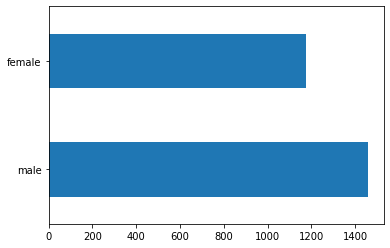

In [137]:
Property_Tax_Appraiser = df[df.LICTYPE == 'Property Tax Appraiser'].gender.value_counts().plot(kind='barh')

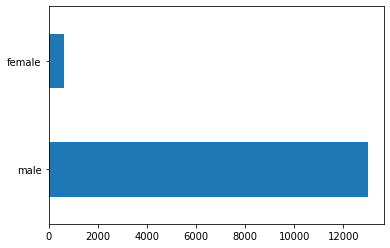

In [138]:
Tow_Trucks = df[df.LICTYPE.str.contains('Tow Truck').fillna(False)].gender.value_counts().plot(kind='barh')

## 34. Calcuate the gender bias for profession

I spent like an hour on this and then realized a super easy way to do it. Welcome to programming! I'll do this part for you.

In [139]:
# So when you do .value_counts(), it gives you an index and a value
df[df['gender'] == 'male'].LICTYPE.value_counts().head()

Apprentice Electrician    95674
Journeyman Electrician    35508
A/C Technician            24714
Master Electrician        15769
Cosmetology Operator      13579
Name: LICTYPE, dtype: int64

We did `pd.concat` to combine dataframes, but you can also use it to combine series (like the results of `value_counts()`). If you give it a few `value_counts()` and give it some column names it'll make something real nice.

In [140]:
# All of the values_counts() we will be combining
vc_series = [
    df[df['gender'] == 'male'].LICTYPE.value_counts(),
    df[df['gender'] == 'female'].LICTYPE.value_counts(),
    df[df['gender'].isnull()].LICTYPE.value_counts()
]
# You need axis=1 so it combines them as columns
gender_df = pd.concat(vc_series, axis=1)
gender_df.head()

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:8: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  


,LICTYPE,LICTYPE,LICTYPE
A/C CE Provider,NaN,NaN,56.0
A/C Contractor,2.0,NaN,16374.0
A/C Technician,24714.0,880.0,2365.0
Appliance Installation Contractor,NaN,NaN,668.0
Appliance Installer,1819.0,66.0,75.0


In [141]:
# Turn "A/C Contractor" etc into an actual column instead of an index
gender_df.reset_index(inplace=True)
gender_df.head()

,index,LICTYPE,LICTYPE,LICTYPE
0,A/C CE Provider,NaN,NaN,56.0
1,A/C Contractor,2.0,NaN,16374.0
2,A/C Technician,24714.0,880.0,2365.0
3,Appliance Installation Contractor,NaN,NaN,668.0
4,Appliance Installer,1819.0,66.0,75.0


In [142]:
# Rename the columns appropriately
gender_df.columns = ["license", "male", "female", "unknown"]
# Clean up the NaN by replacing them with zeroes
gender_df.fillna(0, inplace=True)
gender_df.head()

,license,male,female,unknown
0,A/C CE Provider,0.0,0.0,56.0
1,A/C Contractor,2.0,0.0,16374.0
2,A/C Technician,24714.0,880.0,2365.0
3,Appliance Installation Contractor,0.0,0.0,668.0
4,Appliance Installer,1819.0,66.0,75.0


## 35. Add new columns for total licenses, percent known (not percent unknown!), percent male (of known), percent female (of known)

And replace any `NaN`s with `0`.

In [146]:
df

,LICTYPE,LICNUMBER,BIZCOUNTY,BIZNAME,BIZLINE1,BIZLINE2,BIZCITYSTATE,BIZTELEPHONE,EXPIRATION,OWNER,...,MAILLINE2,MAILCITYSTATE,MAILCOUNTYCODE,MAILCOUNTY,MAILZIP,TELEPHONE,LICSUBTYPE,CEFLAG,FIRSTNAME,gender
0,Associate Auctioneer,7326,ANGELINA,"RISINGER, JIM MARVIN",NaN,NaN,NaN,NaN,2017-08-10,"RISINGER, JIM MARVIN",...,NaN,NACOGDOCHES TX 75964,0347,NACOGDOCHES,75964,9363665745,NaN,N,JIM,male
1,Associate Auctioneer,7962,UPSHUR,"WILLIAMS, JON ANDRE",NaN,NaN,NaN,NaN,2017-12-29,"WILLIAMS, JON ANDRE",...,NaN,KILGORE TX 75662,0183,GREGG,75662,9039187899,NaN,N,JON,male
2,Associate Auctioneer,8406,WILSON,"GUEVARA, JUAN ANTONIO",NaN,NaN,NaN,NaN,2017-09-26,"GUEVARA, JUAN ANTONIO",...,NaN,POTH TX 78147,0493,WILSON,78147,NaN,NaN,N,JUAN,male
3,Associate Auctioneer,10543,HARRIS,"BOWERS, JAMES BRISCOE II",NaN,NaN,NaN,NaN,2017-11-04,"BOWERS, JAMES BRISCOE II",...,NaN,HOUSTON TX 77076-2027,0201,HARRIS,77076,7136445566,NaN,N,JAMES,male
4,Associate Auctioneer,10642,BELL,"DEMSKY, JOHN EDWARD",NaN,NaN,NaN,NaN,2018-02-25,"DEMSKY, JOHN EDWARD",...,NaN,BARTLETT TX 76511,0027,BELL,76511,2549852228,NaN,N,JOHN,male
5,Associate Auctioneer,15650,OUT OF STATE,"THOMPSON, RANDY D",NaN,NaN,NaN,NaN,2017-05-04,"THOMPSON, RANDY D",...,NaN,RINGLING OK 73456,0999,OUT OF STATE,73456,5802765961,NaN,N,RANDY,male
6,Associate Auctioneer,15698,OUT OF STATE,"TUCKER, MONTE EARL",NaN,NaN,NaN,NaN,2017-06-16,"TUCKER, MONTE EARL",...,NaN,SAYRE OK 73662-6080,0999,OUT OF STATE,73662,5802250269,NaN,N,MONTE,male
7,Associate Auctioneer,15810,MILAM,"COOPER, THOMAS JAMES",NaN,NaN,NaN,NaN,2017-03-18,"COOPER, THOMAS JAMES",...,NaN,ROSEBUD TX 76570,0145,FALLS,76570,2815078713,NaN,N,THOMAS,male
8,Associate Auctioneer,15835,OUT OF STATE,"BLANKENSHIP, KERRY NEIL",NaN,NaN,NaN,NaN,2017-05-04,"BLANKENSHIP, KERRY NEIL",...,NaN,RINGLING OK 73456-2014,0999,OUT OF STATE,73456,5802765961,NaN,N,KERRY,female
9,Associate Auctioneer,16784,OUT OF STATE,"DAWES, NICHOLAS MORGAN",NaN,NaN,NaN,NaN,2017-10-19,"DAWES, NICHOLAS MORGAN",...,NaN,DALLAS TX 75219,0113,DALLAS,75219,2144091137,NaN,N,NICHOLAS,male


## 35. What 10 licenses with more than 2,000 people and over 75% known has the most male owners? The most female?

## 36. Let's say you have to call a few people about being in a profession dominated by the other gender. What are their phone numbers?

This will involve doing some research in one dataframe, then the other one. I didn't put an answer here because I'm interested in what you come up with!

## PART FIVE: Violations

### 37. Read in **violations.csv** as `violations_df`, make sure it looks right

In [144]:
pd.set_option("display.max_colwidth", 300)

In [145]:
violations_df = pd.read_csv("violations.csv", dtype = {"fine":int})
violations_df

,basis,city,complaintno,county,licenseno,name,order,orderDate,zipcode
0,"Respondent failed to keep a record of the date and time of each foot spa daily or bi-weekly cleaning and if the foot spa was not used; Respondent failed to keep floors, walls, ceilings, shelves, furniture, furnishings, and fixtures clean and in good repair.",HOUSTON,COS20160024894,HARRIS,748459,"NGUYEN, PHUONG T",Respondent is assessed an administrative penalty in the amount of $300.,3/21/2017,77083
1,Respondent failed to keep a record of the date and time of each foot spa daily or bi-weekly cleaning and if the foot spa was not used.,HOUSTON,COS20170004646,HARRIS,742837,"NGUYEN, SUYEN THI",Respondent is assessed an administrative penalty in the amount of $500.,3/21/2017,77072
2,Respondent failed to maintain the required cleaning and disinfecting records; Respondent failed to clean and sanitize whirlpool foot spas as required at the end of each day; Respondent failed to follow whirlpool foot spas cleaning and sanitization procedures as required bi-weekly.,HOUSTON,COS20170007996,HARRIS,729680,"NGUYEN, XUONG MY","Respondent is assessed an administrative penalty in the amount of $1,875.",3/21/2017,77066
3,Respondent failed to keep a record of the date and time of each foot spa daily or bi-weekly cleaning and if the foot spa was not used.,HOUSTON,COS20170003822,HARRIS,688518,"NGUYEN, NHUNG TUYET",Respondent is assessed an administrative penalty in the amount of $375.,3/8/2017,77083
4,The Respondent's license was revoked upon Respondent's imprisonment in a penitentiary.,HOUSTON,COS20170005470,HARRIS,1209580,"NGUYEN, QUAN M",Respondent's Cosmetology Operator license was revoked by operation of law on 08/31/16.,2/24/2017,77077
5,Respondent failed to disinfect shampoo bowls prior to use for each client; Respondent failed to wipe clean and disinfect electrical equipment that cannot be immersed in the liquid prior to each use on a client; Respondent failed to prepare fresh disinfectant solution daily or more often as neede...,HOUSTON,COS20160003461,HARRIS,742061,"NGUYEN, KIM THUAN-NGOC","Respondent is assessed an administrative penalty in the amount of $1,800.",2/3/2017,77074
6,Respondent failed to keep a record of the date and time of each foot spa daily or bi-weekly cleaning and if the foot spa was not used.,KATY,COS20160026587,HARRIS,747353,"NGUYEN, LEDAI NGOC","Respondent is assessed an administrative penalty in the amount of $1,125.",1/11/2017,77494
7,Respondent failed to keep a record of the date and time of each foot spa daily or bi-weekly cleaning and if the foot spa was not used.,HUMBLE,COS20170000591,HARRIS,742122,"NGUYEN, NGA",Respondent is assessed an administrative penalty in the amount of $750.,1/11/2017,77346
8,Respondent performed or attempted to perform a practice of cosmetology without a license.,HOUSTON,COS20160015193,HARRIS,Not Licensed,"NGUYEN, ANDY",Respondent is assessed an administrative penalty in the amount of $750.,1/9/2017,77019
9,"Respondent failed to disinfect tools, implements, and supplies with an EPA-registered disinfectant solution; Respondent failed to clean diamond, carbide, natural and metal bits after each use with a brush or ultrasonic cleaner, or by immersing in acetone.",HOUSTON,COS20160018700,HARRIS,742837,"NGUYEN, SUYEN THI",Respondent is assessed an administrative penalty in the amount of $750.,11/30/2016,77072


### 38. Combine with your original licenses dataset dataframe to get phone numbers and addresses for each violation. Check that it is 90 rows, 28 columns.

## 39. Find each violation involving a failure with records. Use a regular expression.

In [69]:
violations_df[violations_df.basis.str.contains("record")]

,basis,city,complaintno,county,licenseno,name,order,orderDate,zipcode
0,"Respondent failed to keep a record of the date and time of each foot spa daily or bi-weekly cleaning and if the foot spa was not used; Respondent failed to keep floors, walls, ceilings, shelves, furniture, furnishings, and fixtures clean and in good repair.",HOUSTON,COS20160024894,HARRIS,748459,"NGUYEN, PHUONG T",Respondent is assessed an administrative penalty in the amount of $300.,3/21/2017,77083
1,Respondent failed to keep a record of the date and time of each foot spa daily or bi-weekly cleaning and if the foot spa was not used.,HOUSTON,COS20170004646,HARRIS,742837,"NGUYEN, SUYEN THI",Respondent is assessed an administrative penalty in the amount of $500.,3/21/2017,77072
2,Respondent failed to maintain the required cleaning and disinfecting records; Respondent failed to clean and sanitize whirlpool foot spas as required at the end of each day; Respondent failed to follow whirlpool foot spas cleaning and sanitization procedures as required bi-weekly.,HOUSTON,COS20170007996,HARRIS,729680,"NGUYEN, XUONG MY","Respondent is assessed an administrative penalty in the amount of $1,875.",3/21/2017,77066
3,Respondent failed to keep a record of the date and time of each foot spa daily or bi-weekly cleaning and if the foot spa was not used.,HOUSTON,COS20170003822,HARRIS,688518,"NGUYEN, NHUNG TUYET",Respondent is assessed an administrative penalty in the amount of $375.,3/8/2017,77083
6,Respondent failed to keep a record of the date and time of each foot spa daily or bi-weekly cleaning and if the foot spa was not used.,KATY,COS20160026587,HARRIS,747353,"NGUYEN, LEDAI NGOC","Respondent is assessed an administrative penalty in the amount of $1,125.",1/11/2017,77494
7,Respondent failed to keep a record of the date and time of each foot spa daily or bi-weekly cleaning and if the foot spa was not used.,HUMBLE,COS20170000591,HARRIS,742122,"NGUYEN, NGA",Respondent is assessed an administrative penalty in the amount of $750.,1/11/2017,77346
10,"Respondent failed to keep a record of the date and time of each foot spa daily or bi-weekly cleaning and if the foot spa was not used; Respondent failed to clean, disinfect, and sterilize manicure and pedicure implements after each use.",HOUSTON,COS20160024172,HARRIS,756241,"NGUYEN, IVANNA",Respondent is assessed an administrative penalty in the amount of $925.,11/30/2016,77099
12,Respondent failed to dispose of single use items after each use. Respondent failed to clean and sanitize whirlpool foot spas as required at the end of each day. Respondent failed to keep a record of the date and time of each foot spa daily or bi-weekly cleaning and if the foot spa was not used.,HOUSTON,COS20160022958,HARRIS,711110,"NGUYEN, DUC THI","Respondent is assessed an administrative penalty in the amount of $1,000.",10/3/2016,77084
16,Respondent failed to keep a record of the date and time of each foot spa daily or bi-weekly cleaning and if the foot spa was not used; Respondent failed to follow whirlpool foot spas cleaning and sanitization procedures as required.,HOUSTON,COS20160023083,HARRIS,743934,"NGUYEN, CHANH V","Respondent is assessed an administrative penalty in the amount of $1,125.",8/29/2016,77088
19,Respondent failed to keep a record of the date and time of each foot spa daily or bi-weekly cleaning and if the foot spa was not used.,SPRING,COS20160021148,HARRIS,748989,"NGUYEN, TRUONG V","Respondent is assessed an administrative penalty in the amount of $1,500.",8/24/2016,77388


## 40. How much money was each fine? Use a regular expression and .str.extract (we talked about it before!)

Unfortunately large and helpful troubleshooting tip: `$` means "end of a line" in regex, so `.extract` isn't going to accept it as a dollar sign. You need to escape it by using `\$` instead.

In [72]:
violations_df['fine'] = violations_df.order.str.extract("\$(.*).")

## 41. Clean those results (no commas, no dollar signs, and it should be an integer) and save it to a new column called `fine`

`.replace` is for *entire cells*, you're interested in `.str.replace`, which treats each value like a string, not like a... pandas thing.

`.astype(int)` will convert it into an integer for you.

In [79]:
violations_df['fine'] = violations_df['fine'].str.replace(",", "")

In [83]:
violations_df['fine'] = violations_df.fine.replace(["3750. Respondent's Cosmetology Operator license is revoked", np.nan])


In [88]:
violations_df['fine'] = violations_df.fine.astype(int)

## 42. Which orders results in the top fines?

In [92]:
violations_df['fine'].sort_values(ascending=False).head()

46    4000
31    2250
93    2200
2     1875
5     1800
Name: fine, dtype: int64

## 43. Are you still here???

I'm sure impressed.